# SoftMax Regression
- SoftMax Regression are used when we have multiple classes

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [2]:
data=load_iris()

In [18]:
feature=data.data
target=data.target

In [19]:
df1=pd.DataFrame(feature,columns=data.feature_names)
df2=pd.Series(target)

In [23]:
final=pd.concat([df1,df2],axis=1).rename(columns={0:"target"})

In [24]:
final.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [26]:
final=final[['sepal length (cm)','petal length (cm)','target']]
final.head()

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(final.drop(columns=['target']),final['target'],test_size=0.2,random_state=43)

In [29]:
x_train

,sepal length (cm),petal length (cm)
96,5.7,4.2
19,5.1,1.5
93,5.0,3.3
98,5.1,3.0
108,6.7,5.8
...,...,...
58,6.6,4.6
21,5.1,1.5
49,5.0,1.4
64,5.6,3.6


In [30]:
from sklearn.linear_model import LogisticRegression

In [32]:
model=LogisticRegression(multi_class = 'multinomial')
model.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial')

In [37]:
pred_prob=model.predict_proba(x_test)
pre=model.predict(x_test)

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [38]:
accuracy_score(y_test,pre)

0.9333333333333333

In [40]:
confusion_matrix(y_test,pre)

array([[13,  0,  0],
       [ 0,  8,  0],
       [ 0,  2,  7]], dtype=int64)

# Calculate Probility

In [42]:
query=np.array([[2.68,24.68]])
model.predict_proba(query)

C:\Users\Laptop House\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[1.64111896e-56, 1.49771719e-33, 1.00000000e+00]])

**Note that it sum is always 1.**

In [43]:
1.64111896e-56+ 1.49771719e-33+1.00000000e+00

1.0

In [48]:
1.64111896e-56<1.00000000e+00

True

In [49]:
model.predict(query)

C:\Users\Laptop House\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2])

In [50]:
from mlxtend.plotting import plot_decision_regions

C:\Users\Laptop House\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

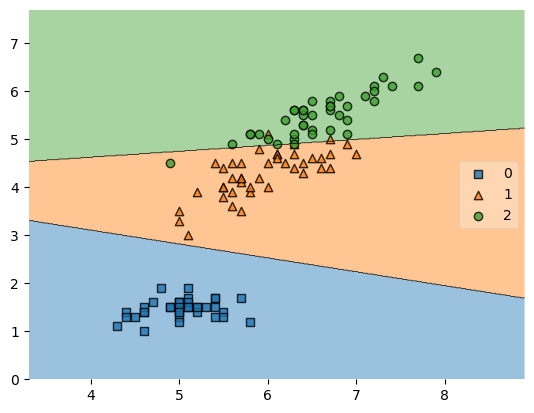

In [52]:
plot_decision_regions(x_train.values,y_train.values,model,legend=5)